<a href="https://colab.research.google.com/github/NeznaikanaLune/MISIS_DS_Masters_degree_2020/blob/master/smriz_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Проблема**
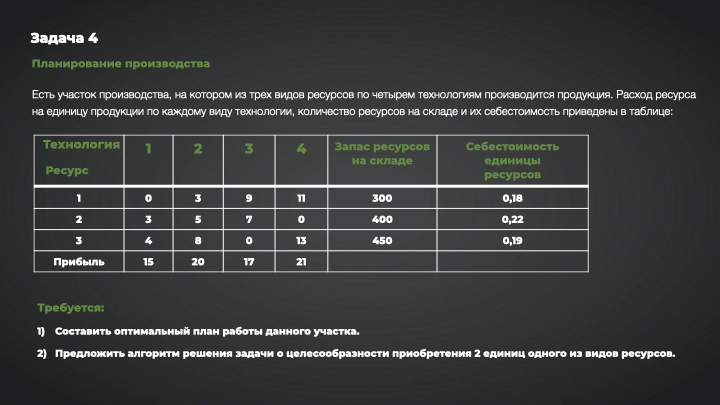

#**2. Содержательная постановка задачи**

#### **Требование 1**(оптимальный план)
Определить план работы участка, а именно, какое количество продукции по каждой технологии необходимо произвести для максимизации прибыли с учетом запасов ресурсов на складе

#### **Требование 2**(целесообразность допокупки)

Определить целесообразность приобретения двух дополнительных единиц одного из видов ресурсов. Сможем ли мы с приобретением двух дополнительных ресурсов увеличить прибыль.






# **3. Формальная математическая модель**

$X_1,X_2,X_3,X_4$ - количество продукции по каждой технологии к производству\
$P = [15,20,17,21]$ - прибыль\
$S = [300,400,450]$ - запас ресурса на складе\
$A = [0.18,0.22,0.19]$ - себестоимость ресурса

$C= \begin{vmatrix}
\ 0 &  3 &9 & 11 \\
\ 3 &  5 & 7 &0  \\
\ 4 & 8 & 0 & 13
\end{vmatrix}$ - расход ресурса на единицу продукции


#### **Требование 1**(оптимальный план)
___________________________________________

**Целевая функция:**

$F(X,P)\rightarrow \max$\
$15X_1+20X_2+17X_3+21X_4\rightarrow \max$\
Можно перейти к задаче минимизации:\
$min(F(X,P)))=-max(-F(X,P)))$\
**Ограничения:**\
$X*C.T \leq S$-ограничение по запасу ресурса

$\begin{equation*}
\left\{
  \begin{array}{lr}
  3X_2+9X_3+11X_4\leq 300\\
  3X_1+5X_2+7X_3\leq 400\\
  4X_1+8X_2+13X_4\leq 450\\
  X \geq 0\\
  \end{array}
\right.
\end{equation*}$


#### **Требование 2**(целесообразность допокупки)
__________________________________________________

**Целевая функция:**
для каждого случая покупки 2х единиц $i$го ресурса\
$F(X,P,A)\rightarrow \max$\
$15X_1+20X_2+17X_3+21X_4-A_i*2\rightarrow \max$\
Можно перейти к задаче минимизации:\
$min(F(X,P))=-max(-F(X,P))$

При оптимизации данной функции для каждого довления 2х едениц $i$го ресурса, $i=[1,2,3]$ будем обновлять соответствуюющее значение доступных ресурсов.
Так при добавлении 2х единиц 1го ресурса вектор доступных ресурсов обновится, как: $S_{new} = [302,400,450]$

**Ограничения:**\
$X*C.T \leq S_{new}$-ограничение по запасу ресурса

$\begin{equation*}
\left\{
  \begin{array}{lr}
  3X_2+9X_3+11X_4\leq S_{1new}\\
  3X_1+5X_2+7X_3\leq S_{2new}\\
  4X_1+8X_2+13X_4\leq S_{3new}\\
  X \geq 0\\
  \end{array}
\right.
\end{equation*}$



# **4. Алгоритм и ПО**
• Python;

• Numpy - open-source модуль для python, который предоставляет общие математические и числовые операции в виде пре-скомпилированных, быстрых функций;

• cvxpy-python модуль для решения задач выпуклой оптимизации.

# **5. Решение задачи**
Код можно запустить по [ссылке](https://colab.research.google.com/drive/1fmWI8gj3tovsY17bJCnFHSGHTBFTWGCs?usp=sharing). Это ссылка на работу, оформленную в Goggle Colab. Goggle Colab — это бесплатная среда для ноутбуков Jupyter, предоставляемая Google.

#### **Требование 1**(оптимальный план)

In [ ]:
import numpy as np
import cvxpy

C = np.array([[0,3,9,11],[3,5,7,0],[4,8,0,13]])
S = np.array([[300,400,450]])#тонн доступно

P = np.array([[15],[20],[17],[21]])

x = cvxpy.Variable(shape=(1,P.shape[0]), integer = False)
total_cost = x*P
C0 = x>=0
C1 = x*C.T<=S

problem = cvxpy.Problem(cvxpy.Maximize(total_cost), constraints=[C0,C1],)
print('Стоимость:',round(problem.solve()),'\nКоличество продукции к производству по технологии 1:',np.round(x.value[0,0],2),'\nКоличество продукции к производству по технологии 2:',np.round(x.value[0,1],2),
      '\nКоличество продукции к производству по технологии 3:',np.round(x.value[0,2],2),'\nКоличество продукции к производству по технологии 4:',np.round(x.value[0,3],2))
print('Остатки 1го ресурса:',round((S-x.value@C.T)[0,0],2),'\nОстатки 2го ресурса:',round((S-x.value@C.T)[0,1],2),'\nОстатки 3го ресурса:',round((S-x.value@C.T)[0,2],2))

Стоимость: 1839 
Количество продукции к производству по технологии 1: 112.5 
Количество продукции к производству по технологии 2: 0.0 
Количество продукции к производству по технологии 3: 8.93 
Количество продукции к производству по технологии 4: 0.0
Остатки 1го ресурса: 219.64 
Остатки 2го ресурса: 0.0 
Остатки 3го ресурса: 0.0


#### **Требование 2**(целесообразность допокупки)





In [ ]:
import numpy as np
import cvxpy

C = np.array([[0,3,9,11],[3,5,7,0],[4,8,0,13]])
S = np.array([[300,400,450]])#тонн доступно
A = np.array([[0.18,0.22,0.19]])
n=2
P = np.array([[15],[20],[17],[21]])

# x = cvxpy.Variable(shape=(1,P.shape[0]), integer = False)
# total_cost = x*P

# C2 = x*C[:,0] >=0.16
# C3 = x*C[:,0] <=0.18
# C4 = x*C[:,1]<=0.09
# C5 = x*C[:,2]<=0.005

for i in range(A.shape[1]):
  print("\033[1mПриобретаем 2 единицы {} ресурса\033[0m".format(i+1))
  S_ = S.copy()
  S_[0,i]+=n

  x = cvxpy.Variable(shape=(1,P.shape[0]), integer = False)
  total_cost = x*P-A[0,i]*n
  C0 = x>=0
  C1 = x*C.T<=S_
  problem = cvxpy.Problem(cvxpy.Maximize(total_cost), constraints=[C0,C1],)
  print('Стоимость:',round(problem.solve()),'\nКоличество продукции к производству по технологии 1:',np.round(x.value[0,0],2),'\nКоличество продукции к производству по технологии 2:',np.round(x.value[0,1],2),
      '\nКоличество продукции к производству по технологии 3:',np.round(x.value[0,2],2),'\nКоличество продукции к производству по технологии 4:',np.round(x.value[0,3],2))
  print('Остатки 1го ресурса:',round((S_-x.value@C.T)[0,0],2),'\nОстатки 2го ресурса:',round((S_-x.value@C.T)[0,1],2),'\nОстатки 3го ресурса:',round((S_-x.value@C.T)[0,2],2))

Приобретаем 2 единицы 1 ресурса
Стоимость: 1839 
Количество продукции к производству по технологии 1: 112.5 
Количество продукции к производству по технологии 2: 0.0 
Количество продукции к производству по технологии 3: 8.93 
Количество продукции к производству по технологии 4: 0.0
Остатки 1го ресурса: 221.64 
Остатки 2го ресурса: 0.0 
Остатки 3го ресурса: 0.0
Приобретаем 2 единицы 2 ресурса
Стоимость: 1844 
Количество продукции к производству по технологии 1: 112.5 
Количество продукции к производству по технологии 2: 0.0 
Количество продукции к производству по технологии 3: 9.21 
Количество продукции к производству по технологии 4: 0.0
Остатки 1го ресурса: 217.07 
Остатки 2го ресурса: 0.0 
Остатки 3го ресурса: 0.0
Приобретаем 2 единицы 3 ресурса
Стоимость: 1843 
Количество продукции к производству по технологии 1: 113.0 
Количество продукции к производству по технологии 2: 0.0 
Количество продукции к производству по технологии 3: 8.71 
Количество продукции к производству по технологи

# **6. Анализ полученных результатов**

#### **Требование 1**(оптимальный план)

Рекомендуется произвести 112,5 единиц продукции по 1й технологии и 8,93 единицы продукции по 2й технологии, обзей стоимостью 1839. Второю и третью технологии в данных уловиях не еркомендуется использовать для производства продукции. При таком плане 1й ресурс используется на 27% процентов. Для еще большей оптимизации результатов необзодимо добавить ограничения.

#### **Требование 2**(целесообразность допокупки)

Приобритение 2х дополнительных единиц 2го или 3го ресурса увеличат прибыль на 5 и 4 денежных единиц соответственно. Дополнительное приобритение 2х единиц 1го ресурса не изменит прибыль. при этом также во всех случаях для производства мы используем ресурс 1 в среднем на 27%.
